# TO EXPLORE SUPERVISED MACHINE LEARNING

# Simple Linear Regression Task

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

In [53]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Reading the data

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [55]:
data.shape

(25, 2)

In [56]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting the data

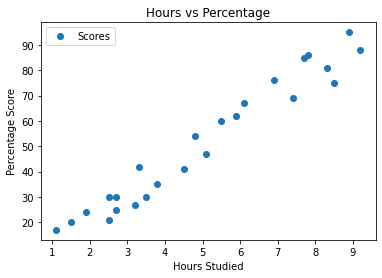

In [57]:
#Plotting the distribution

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**We can clearly see that this a linear model as there is a positive linear relation between the Hours Studied and the Percentage Score as indicated by the plot.**

# Preparing the data by Segregating variables

In [58]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
X.shape,y.shape  

((25, 1), (25,))

# Splitting the data into Train Set and Test Set

In [59]:
#Importing the train test split function

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Implementing Linear Regression by Training the Model

In [60]:
#Importing Linear Regression

from sklearn.linear_model import LinearRegression as LR

In [61]:
#Creating instance of Linear Regression
lr = LR()

#Fitting the model
lr.fit(X_train, y_train)

print("Training complete")

Training complete


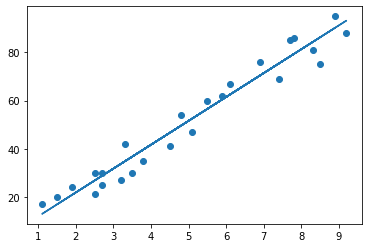

In [62]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Parameter of Linear Regression

In [69]:
lr.coef_

array([9.91065648])

# Making Predictions

In [63]:
print(X_test) #Testing data - In Hours
y_pred = lr.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [64]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Checking assumptions of Linear Model

In [71]:
#Arranging and calculating the residuals

residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


# Checking Distribution of Residuals

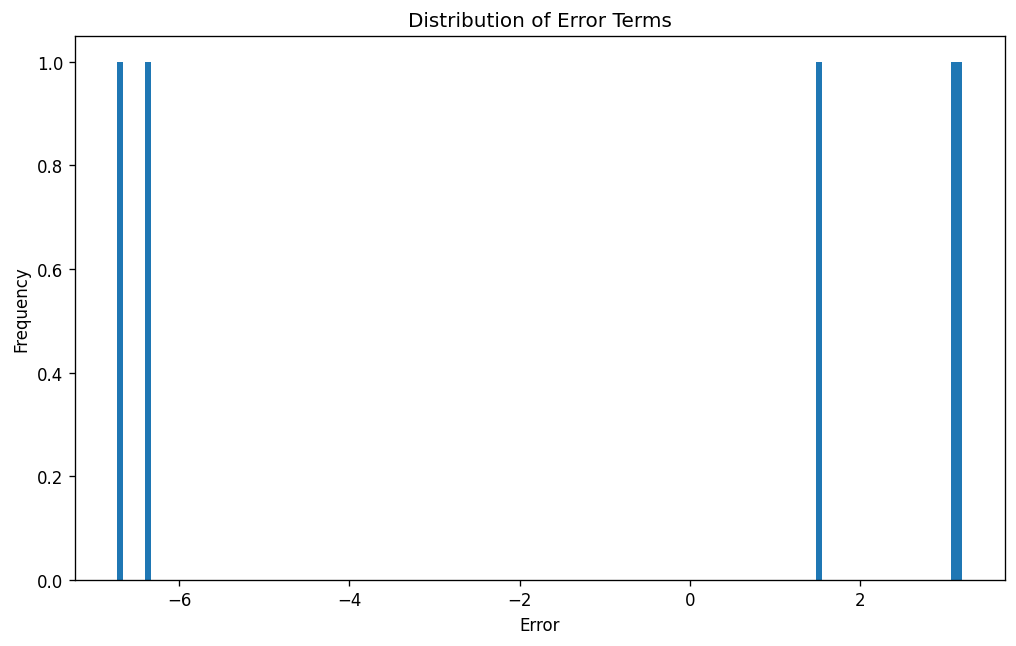

In [79]:
#Histogram for distribution

plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins=150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

# Predicting the Score

In [65]:
hours = np.array([[9.25]])
own = lr.predict(hours)
print(own)

[93.69173249]


In [80]:
hours = np.array([[8.5]])
own = lr.predict(hours)
print(own)

[86.25874013]


# Evaluating the Model

In [81]:
from sklearn.metrics import mean_absolute_error as mae

In [82]:
#predicting over the train set and calculating error

train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

Training Mean Absolute Error 5.186601709180373


In [83]:
#predicting over the test set and predicting error

test_predict = lr.predict(X_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error', k)

Test Mean Absolute Error 4.183859899002982
